Streaming output truncated to the last 5000 lines.
Epoch 5002: MSE = 0.24316943129427393
Epoch 5003: MSE = 0.24316996376569483
Epoch 5004: MSE = 0.24317049624587136
Epoch 5005: MSE = 0.24317102873403035
Epoch 5006: MSE = 0.24317156122939634
Epoch 5007: MSE = 0.24317209373119175
Epoch 5008: MSE = 0.2431726262386365
Epoch 5009: MSE = 0.2431731587509484
Epoch 5010: MSE = 0.24317369126734306
Epoch 5011: MSE = 0.24317422378703385
Epoch 5012: MSE = 0.24317475630923185
Epoch 5013: MSE = 0.24317528883314599
Epoch 5014: MSE = 0.24317582135798305
Epoch 5015: MSE = 0.24317635388294745
Epoch 5016: MSE = 0.24317688640724172
Epoch 5017: MSE = 0.243177418930066
Epoch 5018: MSE = 0.2431779514506184
Epoch 5019: MSE = 0.2431784839680949
Epoch 5020: MSE = 0.24317901648168927
Epoch 5021: MSE = 0.2431795489905933
Epoch 5022: MSE = 0.24318008149399645
Epoch 5023: MSE = 0.24318061399108626
Epoch 5024: MSE = 0.24318114648104816
Epoch 5025: MSE = 0.24318167896306558
Epoch 5026: MSE = 0.24318221143631968
Epoch 

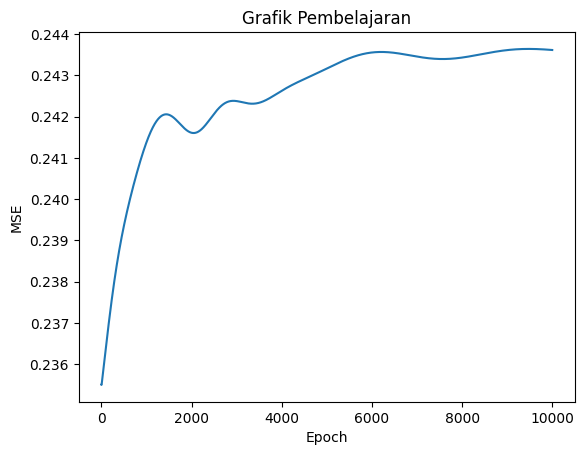

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi aktivasi sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivatif dari fungsi sigmoid
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Inisialisasi bobot secara acak
def initialize_weights(input_size, hidden_size, output_size):
    W1 = np.random.randn(hidden_size, input_size)
    b1 = np.random.randn(hidden_size, 1)
    W2 = np.random.randn(output_size, hidden_size)
    b2 = np.random.randn(output_size, 1)

    weights = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    return weights

# Fungsi feedforward
def feedforward(X, weights):
    W1 = weights["W1"]
    b1 = weights["b1"]
    W2 = weights["W2"]
    b2 = weights["b2"]

    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    activations = {"A1": A1, "A2": A2}
    return activations

# Fungsi backpropagation
def backpropagation(X, Y, activations, weights, learning_rate):
    A1 = activations["A1"]
    A2 = activations["A2"]
    W2 = weights["W2"]

    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / X.shape[1]
    db2 = np.mean(dZ2, axis=1, keepdims=True)

    dZ1 = np.dot(W2.T, dZ2) * sigmoid_derivative(A1)
    dW1 = np.dot(dZ1, X.T) / X.shape[1]
    db1 = np.mean(dZ1, axis=1, keepdims=True)

    # Update bobot dan bias
    weights["W2"] -= learning_rate * dW2
    weights["b2"] -= learning_rate * db2
    weights["W1"] -= learning_rate * dW1
    weights["b1"] -= learning_rate * db1

    return weights

# Fungsi untuk menghitung MSE
def compute_mse(X, Y, weights):
    activations = feedforward(X, weights)
    A2 = activations["A2"]
    mse = np.mean((A2 - Y) ** 2)
    return mse

# Algoritma pembelajaran
def train(X, Y, hidden_size, max_epoch, target_error, learning_rate):
    input_size = X.shape[0]
    output_size = Y.shape[0]

    weights = initialize_weights(input_size, hidden_size, output_size)
    epoch = 0
    mse = float("inf")
    mse_history = []

    while epoch < max_epoch and mse > target_error:
        epoch += 1
        mse = 0

        for i in range(X.shape[1]):
            x = X[:, i].reshape(-1, 1)
            y = Y[:, i].reshape(-1, 1)

            activations = feedforward(x, weights)
            weights = backpropagation(x, y, activations, weights, learning_rate)

            mse += compute_mse(x, y, weights)

        mse /= X.shape[1]
        mse_history.append(mse)

        print("Epoch {}: MSE = {}".format(epoch, mse))

    return weights, mse_history

# Contoh penggunaan
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])
Y = np.array([[0, 1, 1, 0]])

hidden_size = 2
max_epoch = 10000
target_error = 0.01
learning_rate = 0.1

weights, mse_history = train(X, Y, hidden_size, max_epoch, target_error, learning_rate)

# Prediksi
activations = feedforward(X, weights)
predictions = np.round(activations["A2"])
print("Prediksi: {}".format(predictions))

# Plot grafik pembelajaran
plt.plot(range(len(mse_history)), mse_history)
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title("Grafik Pembelajaran")
plt.show()
